# Problem Statement:
One of the hospitals has a patient dataset that contains a wide range of heart-related features. This data allows hospital staff to conduct detailed analyses of heart-related conditions and treatments. We must build a logistic regression model to predict whether a patient has heart disease or not. Calculate the feature importance as well. The dataset contains data for around 303 patients.
 

**Data Description:
age: Age of the patient in years.
gender: Gender of the patient.
cp: Chest pain type.
trestbps: Resting blood pressure (in mm Hg on admission to the hospital).
chol: Serum cholesterol in mg/dl.
fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
restecg: Resting electrocardiographic results.
thalach: Maximum heart rate achieved.
exang: Exercise induced angina (1 = yes; 0 = no).
oldpeak: ST depression induced by exercise relative to rest.
slope: The slope of the peak exercise ST segment.
ca: Number of major vessels (0-3) colored by fluoroscopy.
thal: 3 = normal; 6 = fixed defect; 7 = reversible defect.
heart_diagnosis: Diagnosis of heart disease (angiographic disease status) (0 = No heart disease, >0 = heart disease).**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('heart_disease.csv')
df

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
df.columns

Index(['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heart_diagnosis'],
      dtype='object')

In [6]:
len(df.columns)

14

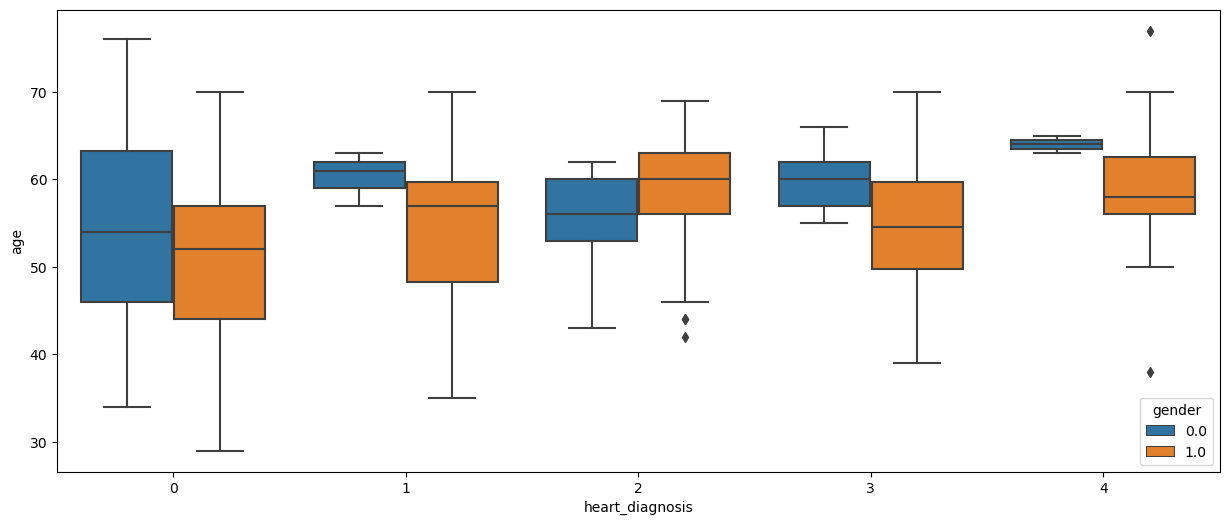

In [7]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, y = 'age',x ='heart_diagnosis', hue ='gender')
plt.show()

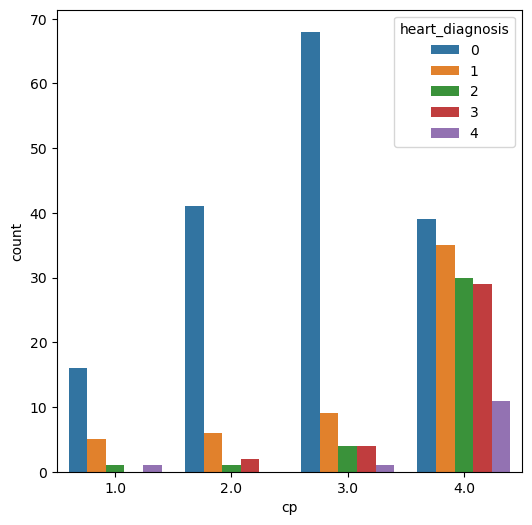

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.countplot(data=df, x = 'cp', hue ='heart_diagnosis')
plt.show()

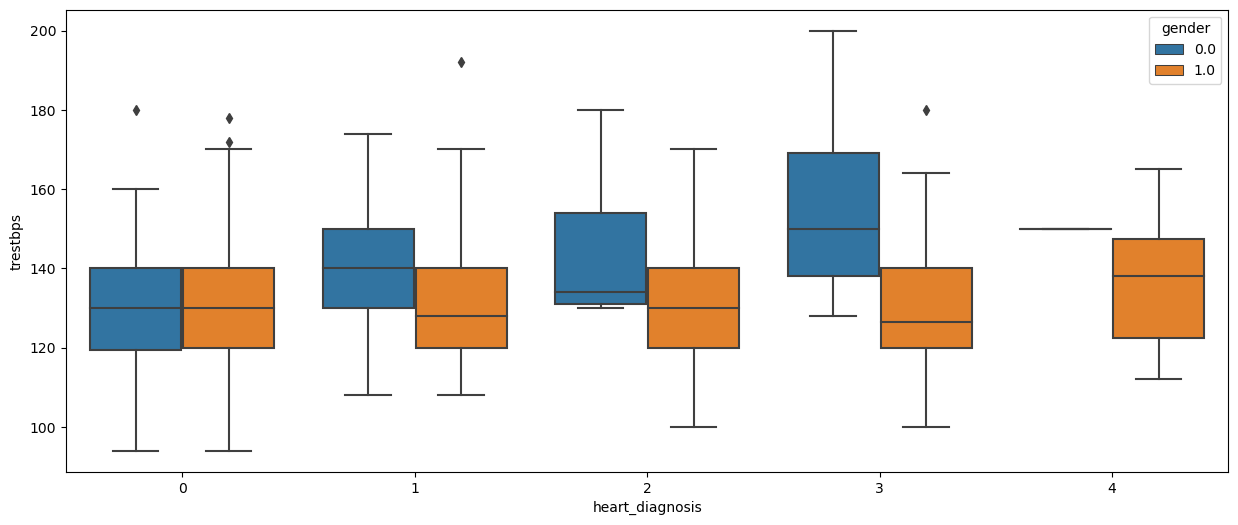

In [9]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, y = 'trestbps',x ='heart_diagnosis', hue ='gender')
plt.show()

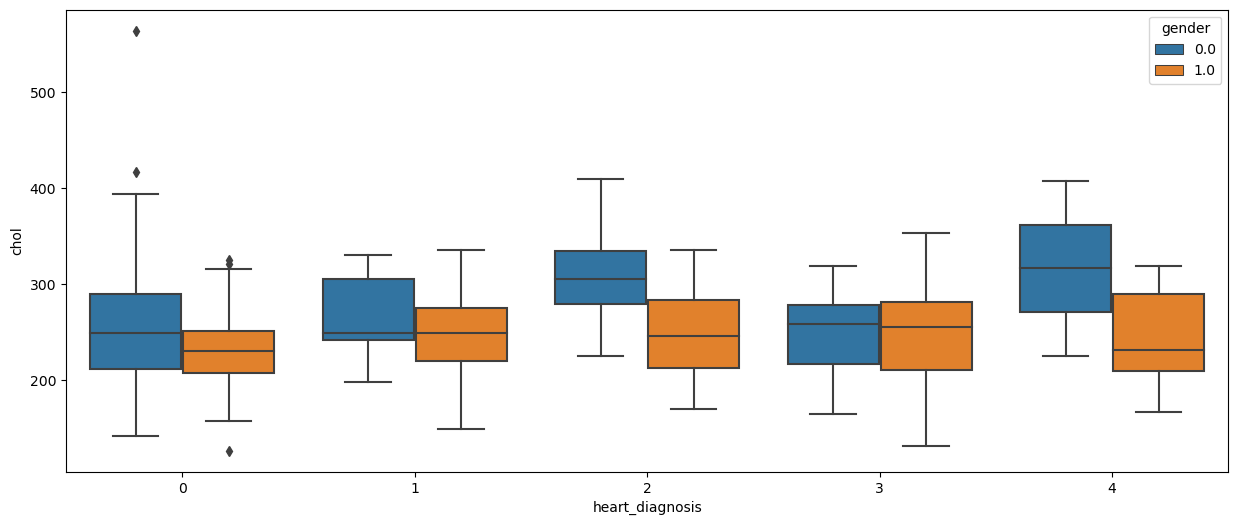

In [10]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, y = 'chol',x ='heart_diagnosis', hue ='gender')
plt.show()

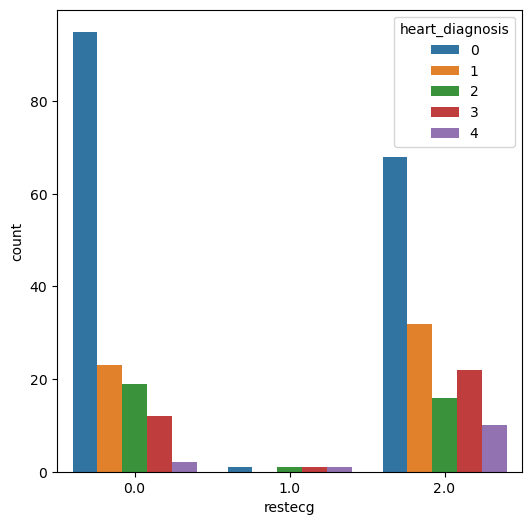

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x = 'restecg', hue ='heart_diagnosis')
plt.show()

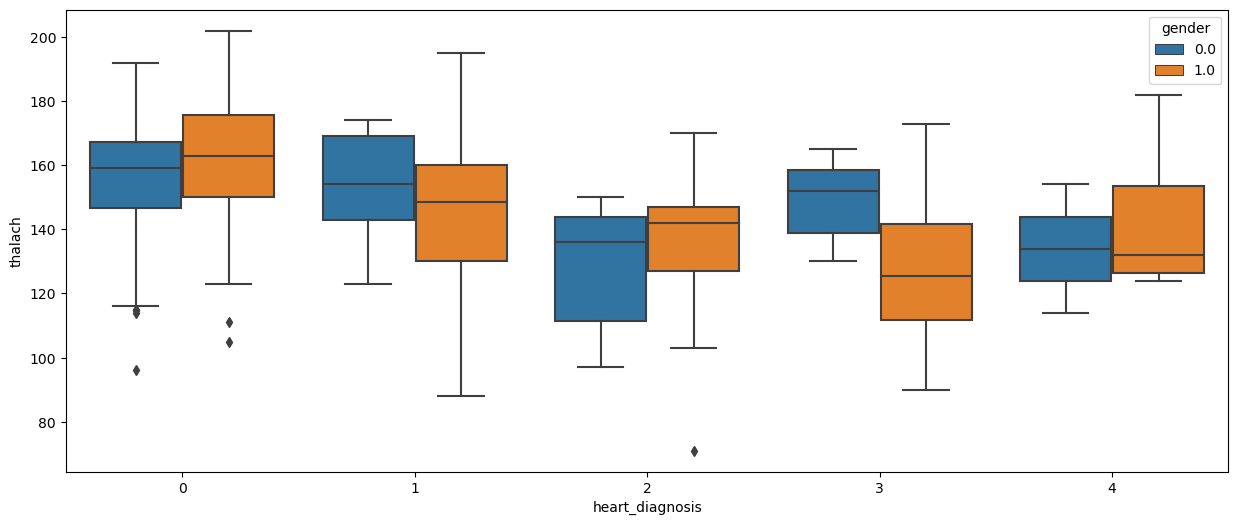

In [12]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, y = 'thalach',x ='heart_diagnosis', hue ='gender')
plt.show()

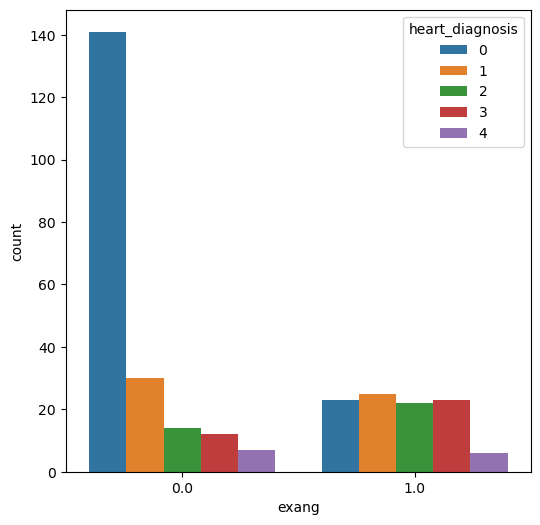

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x = 'exang', hue ='heart_diagnosis')
plt.show()

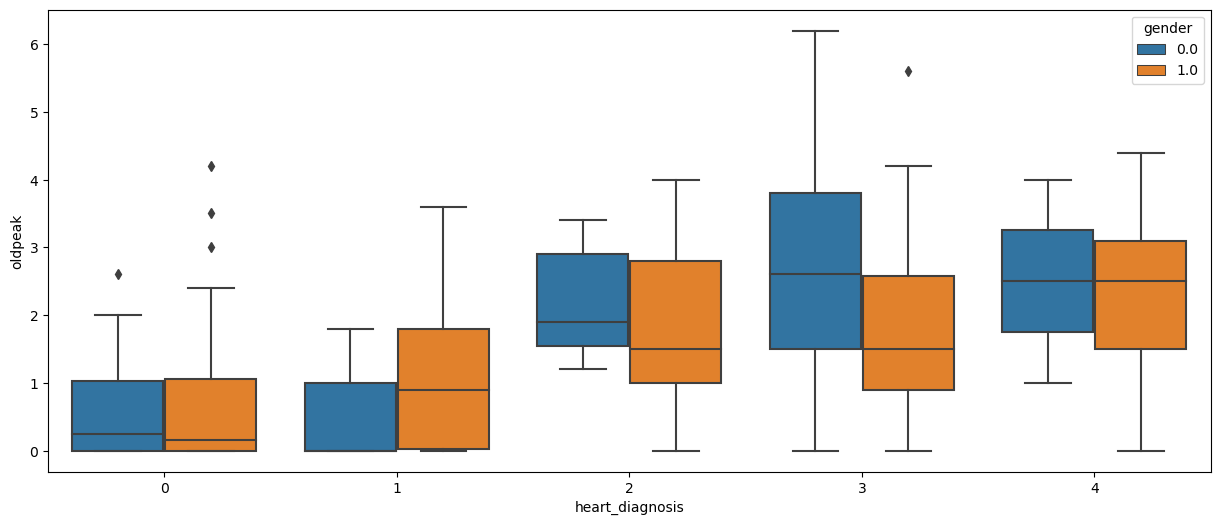

In [14]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, y = 'oldpeak',x ='heart_diagnosis', hue ='gender')
plt.show()

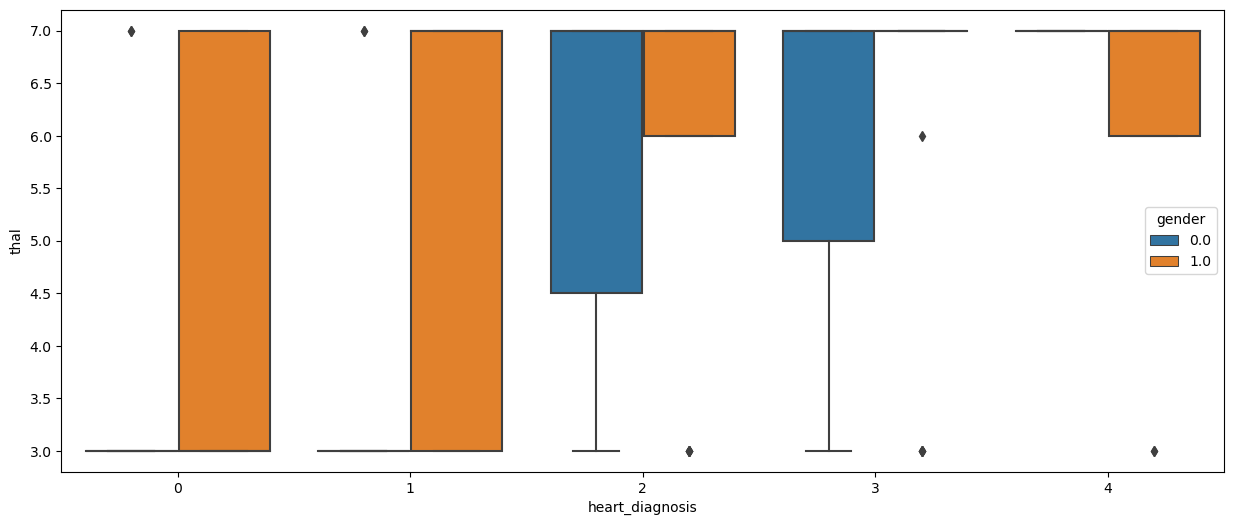

In [15]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, y = 'thal',x ='heart_diagnosis', hue ='gender')
plt.show()

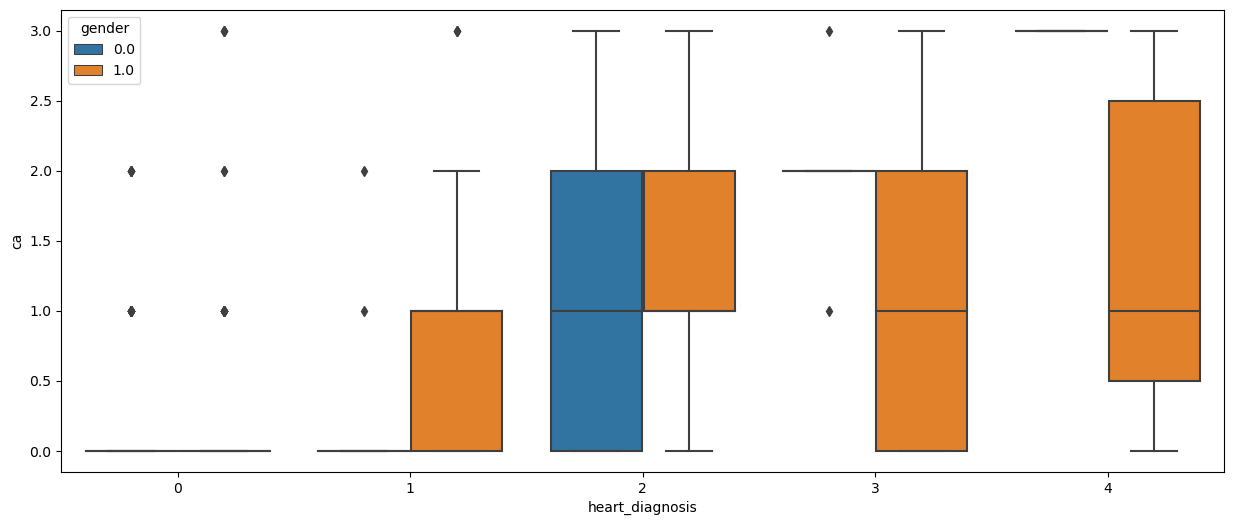

In [16]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, y = 'ca',x ='heart_diagnosis', hue ='gender')
plt.show()

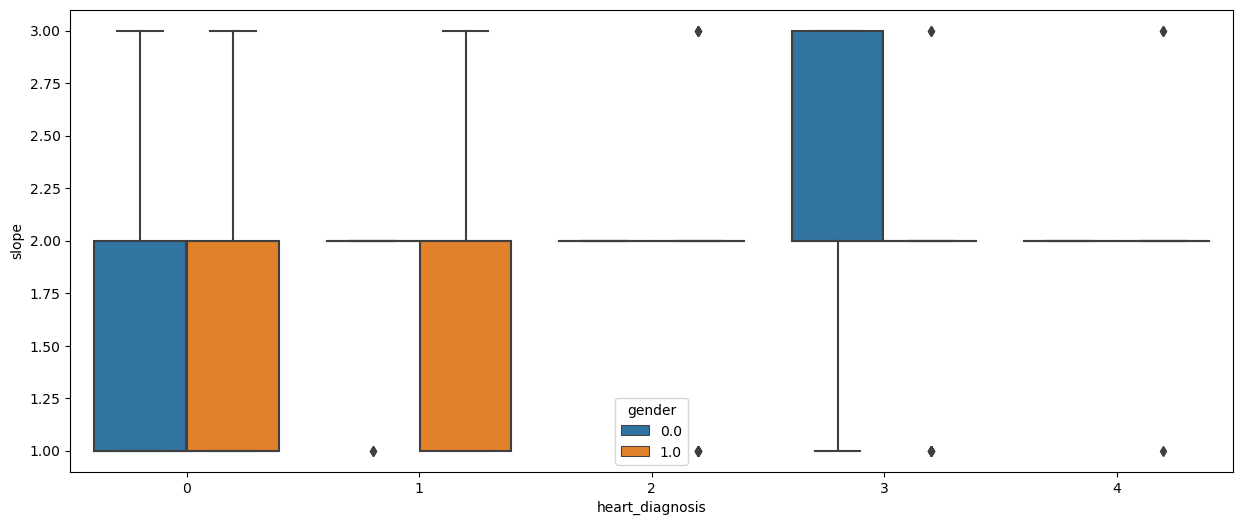

In [17]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, y = 'slope',x ='heart_diagnosis', hue ='gender')
plt.show()

# MISSING VALUE TREATMENT

In [18]:
df.isnull().sum()/len(df)*100

age                0.000000
gender             0.000000
cp                 0.000000
trestbps           0.000000
chol               0.000000
fbs                0.000000
restecg            0.000000
thalach            0.000000
exang              0.000000
oldpeak            0.000000
slope              0.000000
ca                 1.320132
thal               0.660066
heart_diagnosis    0.000000
dtype: float64

df.head(5)

In [19]:
df['ca']=df['ca'].fillna(df['ca'].median())

In [20]:
df['thal']=df['thal'].fillna(df['thal'].mode()[0])

In [21]:
df.isnull().sum()/len(df)*100

age                0.0
gender             0.0
cp                 0.0
trestbps           0.0
chol               0.0
fbs                0.0
restecg            0.0
thalach            0.0
exang              0.0
oldpeak            0.0
slope              0.0
ca                 0.0
thal               0.0
heart_diagnosis    0.0
dtype: float64

# ENCODING AND SCALING

In [22]:
# Identifying numerical and categorical variables :
def data_type(dataset):
    numerical =[]
    categorical =[]
    for i in dataset.columns:
        if dataset[i].dtype=='int64'or dataset[i].dtype=='float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical,categorical
numerical,categorical=data_type(df)

In [23]:
def multinomial_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    multinomial_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1,2,3,]).all():
            multinomial_cols.append(col)
    return multinomial_cols

multinomial_cols = multinomial_columns(df)
multinomial_cols

['gender', 'fbs', 'restecg', 'exang', 'slope', 'ca']

In [24]:
# Removing multinomial columns from the numerical columns
numerical = [i for i in numerical if i not in multinomial_cols]
numerical = df.drop('heart_diagnosis',axis=1)
numerical

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [25]:
# Encoding the categorical data
def encoding(dataset,categorical):
    for i in dataset.columns:
        dataset[i]=dataset[i].astype('category')
        dataset[i]=dataset[i].cat.codes
    return dataset
dataset = encoding(df,categorical) 
dataset

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,29,1,0,31,64,1,2,49,0,22,2,0,1,0
1,33,1,3,40,111,0,2,10,1,15,1,3,0,2
2,33,1,3,14,60,0,2,29,1,25,1,2,2,1
3,3,1,2,22,80,0,0,84,0,32,2,0,0,0
4,7,0,1,22,35,0,2,71,0,14,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,11,1,0,8,93,0,0,32,0,12,1,0,2,1
299,34,1,3,30,26,1,0,40,0,31,1,2,2,2
300,23,1,3,22,1,0,0,16,1,12,1,1,2,3
301,23,0,1,22,67,0,2,73,0,0,1,1,0,1


In [26]:
dataset

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,29,1,0,31,64,1,2,49,0,22,2,0,1,0
1,33,1,3,40,111,0,2,10,1,15,1,3,0,2
2,33,1,3,14,60,0,2,29,1,25,1,2,2,1
3,3,1,2,22,80,0,0,84,0,32,2,0,0,0
4,7,0,1,22,35,0,2,71,0,14,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,11,1,0,8,93,0,0,32,0,12,1,0,2,1
299,34,1,3,30,26,1,0,40,0,31,1,2,2,2
300,23,1,3,22,1,0,0,16,1,12,1,1,2,3
301,23,0,1,22,67,0,2,73,0,0,1,1,0,1


In [27]:
numerical

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [28]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'y' is your target variable
# Replace 'y' with your actual target variable

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the target variable
y_scaled = scaler.fit_transform(dataset["heart_diagnosis"].values.reshape(-1, 1))

y_scaled

array([[0.  ],
       [0.5 ],
       [0.25],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.75],
       [0.  ],
       [0.5 ],
       [0.25],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.25],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.25],
       [0.75],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.75],
       [0.  ],
       [0.5 ],
       [0.25],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.75],
       [0.25],
       [0.75],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.25],
       [1.  ],
       [0.  ],
       [1.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [0.25],
       [0.25],
       [0.25],
       [0.25],
       [0.  ],
       [0.  ],
       [0.5 ],
       [0.  ],
       [0.25],
       [0.  ],
       [0.5 ],
       [0.5 ],
       [0.

In [29]:
# Assuming 'y_scaled' contains the scaled probabilities
# Replace 'y_scaled' with your actual scaled probabilities

# Define a threshold
threshold = 0.5

# Convert probabilities to class labels
y_pred_class = (y_scaled >= threshold).astype(int)

# Print the converted class labels
print("Class labels after thresholding:")
print(y_pred_class)
len(y_pred_class)

Class labels after thresholding:
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [

303

In [30]:
x = df.iloc[:,0:13]
y = y_pred_class


In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.2)


In [32]:
len(x)

303

In [33]:
len(y)

303

In [34]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
import statsmodels.api as sm
logreg = sm.Logit(y_train,x_train).fit()
logreg

Optimization terminated successfully.
         Current function value: 0.321895
         Iterations 7


In [35]:
y_predict=logreg.predict(x_test)

In [36]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      229
Method:                           MLE   Df Model:                           12
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.4343
Time:                        14:06:11   Log-Likelihood:                -77.899
converged:                       True   LL-Null:                       -137.71
Covariance Type:            nonrobust   LLR p-value:                 7.360e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0722      0.026     -2.775      0.006      -0.123      -0.021
gender        -0.6498      0.525     -1.237      0.216      -1.680       0.380
cp             0.0130      0.221      0.059      0.953      -0.420       0.446
trestbps       0.0047      0.021      0.222      0.825      -0.037       0.047
chol          -0.0020      0.006     -0.339      0.735      -0.013       0.009
fbs            1.1282      0.578      1.952      0.051      -0.004       2.261
restecg       -0.1251      0.218     -0.573      0.566      -0.553       0.303
thalach       -0.0441      0.009     -4.791      0.000      -0.062      -0.026
exang          0.1486      0.492      0.302      0.763      -0.816       1.113
oldpeak        0.0739      0.025      2.938      0.003       0.025       0.123
slope          0.3715      0.405      0.917      0.359      -0.422       1.165
ca             0.9971      0.268      3.718      0.000       0.471       1.523
thal           0.9147      0.258      3.550      0.000       0.410       1.420
==============================================================================
"""

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [38]:
x_train.drop("cp",axis=True,inplace=True)

In [39]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,x_train).fit()
logreg

Optimization terminated successfully.
         Current function value: 0.321903
         Iterations 7


In [40]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      230
Method:                           MLE   Df Model:                           11
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.4343
Time:                        14:06:11   Log-Likelihood:                -77.900
converged:                       True   LL-Null:                       -137.71
Covariance Type:            nonrobust   LLR p-value:                 2.166e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0720      0.026     -2.811      0.005      -0.122      -0.022
gender        -0.6462      0.522     -1.238      0.216      -1.669       0.377
trestbps       0.0048      0.021      0.225      0.822      -0.037       0.047
chol          -0.0019      0.006     -0.333      0.739      -0.013       0.009
fbs            1.1218      0.567      1.979      0.048       0.011       2.233
restecg       -0.1236      0.217     -0.571      0.568      -0.548       0.301
thalach       -0.0440      0.009     -4.854      0.000      -0.062      -0.026
exang          0.1602      0.450      0.356      0.722      -0.722       1.043
oldpeak        0.0737      0.025      2.948      0.003       0.025       0.123
slope          0.3746      0.402      0.933      0.351      -0.413       1.162
ca             1.0002      0.263      3.802      0.000       0.485       1.516
thal           0.9165      0.256      3.581      0.000       0.415       1.418
==============================================================================
"""

In [41]:
x_train.drop("trestbps",axis=True,inplace=True)

In [42]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,x_train).fit()
logreg

Optimization terminated successfully.
         Current function value: 0.322007
         Iterations 7


In [43]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      231
Method:                           MLE   Df Model:                           10
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.4341
Time:                        14:06:11   Log-Likelihood:                -77.926
converged:                       True   LL-Null:                       -137.71
Covariance Type:            nonrobust   LLR p-value:                 6.199e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0699      0.024     -2.938      0.003      -0.117      -0.023
gender        -0.6472      0.521     -1.243      0.214      -1.668       0.373
chol          -0.0016      0.006     -0.293      0.770      -0.013       0.009
fbs            1.1362      0.564      2.016      0.044       0.032       2.241
restecg       -0.1172      0.215     -0.546      0.585      -0.538       0.304
thalach       -0.0435      0.009     -4.950      0.000      -0.061      -0.026
exang          0.1669      0.448      0.372      0.710      -0.712       1.046
oldpeak        0.0747      0.025      3.030      0.002       0.026       0.123
slope          0.3745      0.402      0.932      0.351      -0.413       1.162
ca             0.9889      0.257      3.846      0.000       0.485       1.493
thal           0.9173      0.255      3.590      0.000       0.417       1.418
==============================================================================
"""

In [44]:
x_train.drop("chol",axis=True,inplace=True)

In [45]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,x_train).fit()
logreg

Optimization terminated successfully.
         Current function value: 0.322184
         Iterations 7


In [46]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      232
Method:                           MLE   Df Model:                            9
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.4338
Time:                        14:06:11   Log-Likelihood:                -77.969
converged:                       True   LL-Null:                       -137.71
Covariance Type:            nonrobust   LLR p-value:                 1.708e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0725      0.022     -3.282      0.001      -0.116      -0.029
gender        -0.6290      0.515     -1.220      0.222      -1.639       0.381
fbs            1.1453      0.562      2.036      0.042       0.043       2.248
restecg       -0.1275      0.212     -0.602      0.547      -0.542       0.288
thalach       -0.0444      0.008     -5.423      0.000      -0.060      -0.028
exang          0.1336      0.435      0.307      0.759      -0.718       0.986
oldpeak        0.0749      0.025      3.038      0.002       0.027       0.123
slope          0.3669      0.400      0.917      0.359      -0.418       1.151
ca             0.9854      0.257      3.830      0.000       0.481       1.490
thal           0.9122      0.255      3.580      0.000       0.413       1.412
==============================================================================
"""

In [47]:
x_train.drop("exang",axis=True,inplace=True)

In [48]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,x_train).fit()
logreg

Optimization terminated successfully.
         Current function value: 0.322379
         Iterations 7


In [49]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      233
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.4335
Time:                        14:06:11   Log-Likelihood:                -78.016
converged:                       True   LL-Null:                       -137.71
Covariance Type:            nonrobust   LLR p-value:                 4.440e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0720      0.022     -3.277      0.001      -0.115      -0.029
gender        -0.6075      0.512     -1.187      0.235      -1.611       0.395
fbs            1.1563      0.561      2.063      0.039       0.058       2.255
restecg       -0.1223      0.211     -0.579      0.562      -0.536       0.291
thalach       -0.0448      0.008     -5.513      0.000      -0.061      -0.029
oldpeak        0.0756      0.024      3.092      0.002       0.028       0.123
slope          0.3831      0.395      0.969      0.332      -0.391       1.158
ca             0.9795      0.256      3.827      0.000       0.478       1.481
thal           0.9314      0.247      3.764      0.000       0.446       1.416
==============================================================================
"""

In [50]:
x_train.drop("restecg",axis=True,inplace=True)

In [51]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,x_train).fit()
logreg

Optimization terminated successfully.
         Current function value: 0.323076
         Iterations 7


In [52]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      234
Method:                           MLE   Df Model:                            7
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.4322
Time:                        14:06:11   Log-Likelihood:                -78.184
converged:                       True   LL-Null:                       -137.71
Covariance Type:            nonrobust   LLR p-value:                 1.209e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0744      0.022     -3.438      0.001      -0.117      -0.032
gender        -0.6371      0.511     -1.247      0.212      -1.638       0.364
fbs            1.1414      0.559      2.040      0.041       0.045       2.238
thalach       -0.0454      0.008     -5.603      0.000      -0.061      -0.030
oldpeak        0.0765      0.024      3.130      0.002       0.029       0.124
slope          0.3499      0.391      0.895      0.371      -0.416       1.116
ca             0.9549      0.252      3.790      0.000       0.461       1.449
thal           0.9370      0.248      3.774      0.000       0.450       1.424
==============================================================================
"""

In [53]:
x_train.drop("slope",axis=True,inplace=True)

In [54]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,x_train).fit()
logreg

Optimization terminated successfully.
         Current function value: 0.324720
         Iterations 7


In [55]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      235
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.4294
Time:                        14:06:11   Log-Likelihood:                -78.582
converged:                       True   LL-Null:                       -137.71
Covariance Type:            nonrobust   LLR p-value:                 3.794e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0683      0.020     -3.394      0.001      -0.108      -0.029
gender        -0.5695      0.501     -1.136      0.256      -1.552       0.413
fbs            1.1872      0.555      2.141      0.032       0.100       2.274
thalach       -0.0460      0.008     -5.664      0.000      -0.062      -0.030
oldpeak        0.0879      0.021      4.176      0.000       0.047       0.129
ca             0.8976      0.238      3.770      0.000       0.431       1.364
thal           0.9310      0.246      3.783      0.000       0.449       1.413
==============================================================================
"""

In [56]:
x_train.drop("gender",axis=True,inplace=True)

In [57]:
import statsmodels.api as sm
logreg = sm.Logit(y_train,x_train).fit()
logreg

Optimization terminated successfully.
         Current function value: 0.327441
         Iterations 7


In [58]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  242
Model:                          Logit   Df Residuals:                      236
Method:                           MLE   Df Model:                            5
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                  0.4246
Time:                        14:06:11   Log-Likelihood:                -79.241
converged:                       True   LL-Null:                       -137.71
Covariance Type:            nonrobust   LLR p-value:                 1.399e-23
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0711      0.020     -3.553      0.000      -0.110      -0.032
fbs            1.1194      0.544      2.056      0.040       0.053       2.186
thalach       -0.0487      0.008     -6.270      0.000      -0.064      -0.033
oldpeak        0.0838      0.020      4.111      0.000       0.044       0.124
ca             0.8760      0.236      3.710      0.000       0.413       1.339
thal           0.8017      0.213      3.757      0.000       0.383       1.220
==============================================================================
"""

In [59]:
x_train

,age,fbs,thalach,oldpeak,ca,thal
286,24,1,45,26,2,1
102,23,0,58,0,1,0
242,15,0,62,0,0,0
65,26,0,41,26,2,2
35,8,0,76,0,0,0
...,...,...,...,...,...,...
156,17,0,72,16,0,2
123,21,0,12,38,0,2
15,23,0,73,16,0,0
125,11,0,74,6,0,0


In [60]:
x_train_tuned = sm.add_constant(x_train)
x_test_tuned = sm.add_constant(x_test)

In [61]:
len(y_train)

242

In [62]:
x_train_tuned

,const,age,fbs,thalach,oldpeak,ca,thal
286,1.0,24,1,45,26,2,1
102,1.0,23,0,58,0,1,0
242,1.0,15,0,62,0,0,0
65,1.0,26,0,41,26,2,2
35,1.0,8,0,76,0,0,0
...,...,...,...,...,...,...,...
156,1.0,17,0,72,16,0,2
123,1.0,21,0,12,38,0,2
15,1.0,23,0,73,16,0,0
125,1.0,11,0,74,6,0,0


In [63]:
logreg_tuned = sm.Logit(y_train,x_train_tuned).fit()

Optimization terminated successfully.
         Current function value: 0.312093
         Iterations 7


In [64]:
len(y_test)

61

In [65]:
print(logreg_tuned)

In [66]:
x_test_tuned.drop(columns=["gender","trestbps","chol","fbs","restecg","thalach","exang"],axis=1,inplace=True)

In [67]:
print(x_test_tuned)

     const  age  cp  oldpeak  slope  ca  thal
246    1.0   24   3        1      0   1     2
183    1.0   25   0       36      2   0     2
229    1.0   32   3        1      0   1     0
126    1.0   22   3       35      2   2     2
184    1.0   26   3        0      0   0     0
..     ...  ...  ..      ...    ...  ..   ...
277    1.0    5   2        0      1   0     0
121    1.0   29   3       35      1   3     2
187    1.0   32   1        0      1   3     1
301    1.0   23   1        0      1   1     0
283    1.0    2   1        0      0   0     0

[61 rows x 7 columns]


In [68]:
x_test_tuned

,const,age,cp,oldpeak,slope,ca,thal
246,1.0,24,3,1,0,1,2
183,1.0,25,0,36,2,0,2
229,1.0,32,3,1,0,1,0
126,1.0,22,3,35,2,2,2
184,1.0,26,3,0,0,0,0
...,...,...,...,...,...,...,...
277,1.0,5,2,0,1,0,0
121,1.0,29,3,35,1,3,2
187,1.0,32,1,0,1,3,1
301,1.0,23,1,0,1,1,0


In [69]:
y_pred = logreg_tuned.predict(x_test_tuned)

In [70]:
from sklearn.impute import SimpleImputer

In [71]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already trained your model, selected features, and predicted values

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)  # Example threshold of 0.5 for binary classification

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy Score:", accuracy)




Accuracy Score: 0.7377049180327869


In [72]:
# Generate classification report
class_report = classification_report(y_test, y_pred_binary)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        39
           1       0.58      1.00      0.73        22

    accuracy                           0.74        61
   macro avg       0.79      0.79      0.74        61
weighted avg       0.85      0.74      0.74        61



In [73]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[23 16]
 [ 0 22]]


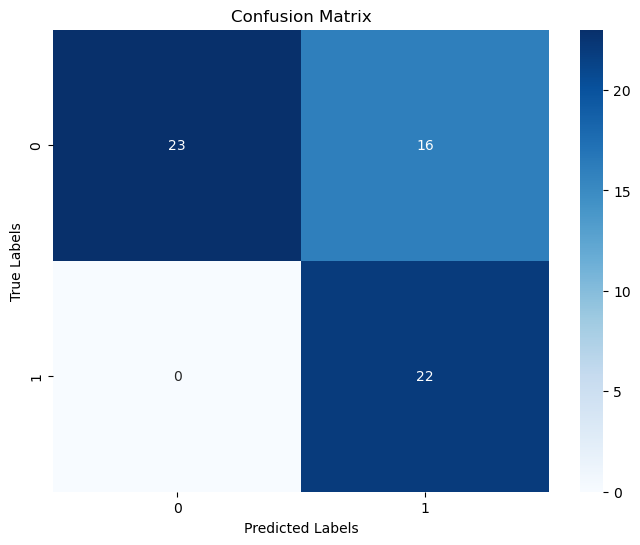

In [74]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [75]:
y_pred_class = pd.DataFrame(y_pred_class)

In [76]:
from sklearn.impute import SimpleImputer

In [77]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(dataset)

In [78]:
x = dataset.drop(columns=['heart_diagnosis'],axis=1,inplace= True)  # Assuming 'target' is the name of the target column
y = y_pred_class


In [79]:
len(X_imputed)

303

In [80]:
len(y)

303

In [81]:
from sklearn.inspection import permutation_importance

clf = LogisticRegression()
clf.fit(X_imputed, y)


C:\Users\Pooja\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pooja\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
print(X_imputed)

[[29.  1.  0. ...  0.  1.  0.]
 [33.  1.  3. ...  3.  0.  2.]
 [33.  1.  3. ...  2.  2.  1.]
 ...
 [23.  1.  3. ...  1.  2.  3.]
 [23.  0.  1. ...  1.  0.  1.]
 [ 4.  1.  2. ...  0.  0.  0.]]


In [82]:
# Perform permutation-based feature importance
result = permutation_importance(clf,X_imputed, y, n_repeats=10, random_state=42)

# Get the sorted feature importance indices
sorted_idx = result.importances_mean.argsort()



In [93]:
feature_names = ['age', 'gender', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [94]:
feature_names.append('heart_daignosis')

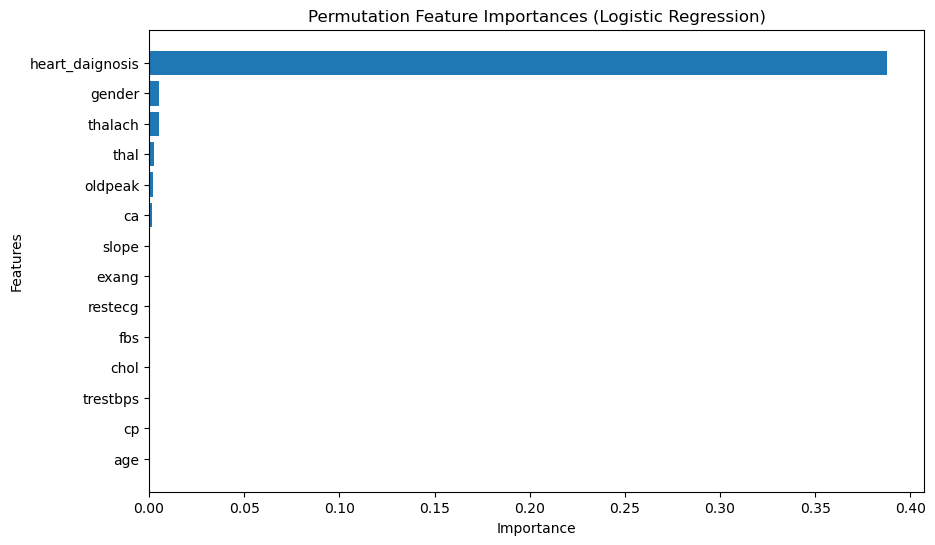

In [95]:


# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Permutation Feature Importances (Logistic Regression)')
plt.show()